In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt
%pip install -r requirements.txt

path = '/content/drive/MyDrive/custom_dataset/helmet_test.zip'

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-162-g2611477 torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.6/78.2 GB disk)


In [ ]:
ls

CONTRIBUTING.md  export.py   models/            setup.cfg       utils/
data/            hubconf.py  README.md          train.py        val.py
detect.py        LICENSE     requirements.txt*  tutorial.ipynb


In [ ]:
!unzip /content/yolov5/helmet_test.zip

Archive:  /content/yolov5/helmet_test.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: README.dataset.txt      
replace README.roboflow.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: README.roboflow.txt     
replace data.yaml? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: data.yaml               
replace test/images/000123_jpg.rf.cd7ef0d48ae1575c53ab2e96f32afdb7.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: test/images/000123_jpg.rf.cd7ef0d48ae1575c53ab2e96f32afdb7.jpg  
replace test/images/000273_jpg.rf.01c571274aeb8ffe9843ffb1d94a0529.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: test/images/000273_jpg.rf.01c571274aeb8ffe9843ffb1d94a0529.jpg  
replace test/images/000318_jpg.rf.ee21ce5155cc777e5d648a0c55572b9c.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: test/images/000318_jpg.rf.ee21ce5155cc777e5d648a0c55572b9c.jpg  
replace test/images/001192_jpg.rf.db8fc0978964351c2b20ceec0d182edb.jpg? [y]es,

In [ ]:
from glob import glob #이미지를 한번에 긁어모으기 위한 glob 모듈

img_list = glob('train/images/*.jpg') # 트레인 이미지 경로
val_img_list = glob('test/images/*.jpg') # 테스트 이미지 경로

In [ ]:
ls

CONTRIBUTING.md  LICENSE              requirements.txt*  tutorial.ipynb
data/            models/              runs/              utils/
data.yaml        __pycache__/         setup.cfg          valid/
detect.py        README.dataset.txt   test/              val.py
export.py        README.md            train/
hubconf.py       README.roboflow.txt  train.py


In [ ]:
with open('train/train.txt', 'w') as f:
    f.write('\n'.join(img_list) + '\n')

with open('test/test.txt', 'w') as f:
    f.write('\n'.join(val_img_list) + '\n')

In [ ]:
!python train.py --img 416 --batch 16 --epochs 50 --data data.yaml --weights yolov5x.pt --name result_jetbot --cfg models/yolov5x.yaml

train: weights=yolov5x.pt, cfg=models/yolov5x.yaml, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=result_jetbot, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-162-g2611477 torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v

In [ ]:
!python detect.py --weights runs/train/result_jetbot9/weights/best.pt --img 320 --conf 0.5 --source /content/yolov5/yolov5/000462_jpg.rf.8acba5751dcbfc20f51bae81d6d911b4.jpg

detect: weights=['runs/train/result_jetbot9/weights/best.pt'], source=/content/yolov5/yolov5/000462_jpg.rf.8acba5751dcbfc20f51bae81d6d911b4.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-162-g2611477 torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86173414 parameters, 0 gradients, 204.0 GFLOPs
image 1/1 /content/yolov5/yolov5/000462_jpg.rf.8acba5751dcbfc20f51bae81d6d911b4.jpg: 320x288 2 helmets, Done. (0.091s)
Speed: 0.6ms pre-process, 91.3ms inference, 2.5ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/detect/exp3


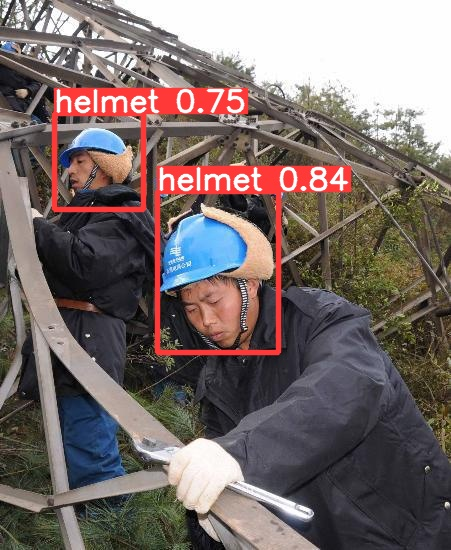

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/yolov5/yolov5/runs/detect/exp3/000462_jpg.rf.8acba5751dcbfc20f51bae81d6d911b4.jpg')
cv2_imshow(img)

In [ ]:
!python detect.py --weights runs/train/result_jetbot9/weights/best.pt --img 320 --conf 0.5 --source /content/yolov5/yolov5/firstTest/helemt1.jpeg

detect: weights=['runs/train/result_jetbot9/weights/best.pt'], source=/content/yolov5/yolov5/firstTest/helemt1.jpeg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-162-g2611477 torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86173414 parameters, 0 gradients, 204.0 GFLOPs
image 1/1 /content/yolov5/yolov5/firstTest/helemt1.jpeg: 256x320 2 helmets, Done. (0.109s)
Speed: 0.6ms pre-process, 109.4ms inference, 2.3ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/detect/exp5


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/yolov5/yolov5/runs/detect/exp5/helemt1.jpeg')
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!python detect.py --weights runs/train/result_jetbot9/weights/best.pt --img 320 --conf 0.5 --source /content/yolov5/yolov5/firstTest/helmet2.jpeg

detect: weights=['runs/train/result_jetbot9/weights/best.pt'], source=/content/yolov5/yolov5/firstTest/helmet2.jpeg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-162-g2611477 torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86173414 parameters, 0 gradients, 204.0 GFLOPs
image 1/1 /content/yolov5/yolov5/firstTest/helmet2.jpeg: 256x320 3 helmets, Done. (0.099s)
Speed: 0.5ms pre-process, 99.1ms inference, 2.5ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/detect/exp8


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/yolov5/yolov5/runs/detect/exp8/helmet2.jpeg')
cv2_imshow(img)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
!cp -r /content/yolov5/yolov5/runs /content/drive/MyDrive/models

In [ ]:
!python detect.py --weights runs/train/result_jetbot9/weights/best.pt --img 320 --conf 0.5 --source /content/yolov5/yolov5/firstTest/wooks.png

detect: weights=['runs/train/result_jetbot9/weights/best.pt'], source=/content/yolov5/yolov5/firstTest/wooks.png, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-162-g2611477 torch 1.11.0+cu113 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86173414 parameters, 0 gradients, 204.0 GFLOPs
image 1/1 /content/yolov5/yolov5/firstTest/wooks.png: 320x256 Done. (0.090s)
Speed: 0.5ms pre-process, 90.1ms inference, 0.5ms NMS per image at shape (1, 3, 320, 320)
Results saved to runs/detect/exp11
